In [1]:
import sys
import os

# # Get the project root (go up from tests to project root)
project_root = os.path.dirname(os.path.abspath('.'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

### Get Key Moments

In [2]:
from models.KeyMomentsFinder import KeyMomentsFinder

In [3]:
kmf = KeyMomentsFinder()
match_id = 1886347

In [ ]:
def shot_sequence_logic(df):
    """Logic for shot sequences: all events before and including each shot get same number"""
    df = df[(df['lead_to_shot'] == True) & (df['event_type'] == 'player_possession')]
    return (df['end_type'] == 'shot').cumsum().shift(1, fill_value=0) + 1

config = {
    'search_parameters': {
        'match_id': match_id,
        'sequence_func': shot_sequence_logic,
        'start_buffer': 30,
        'end_buffer': 20,
        'column_aggregations': {
            'lead_to_goal': 'first',
            'team_shortname': 'first'
        }
    },
    'save_parameters': {
        'enabled': True,
        'name': f'{match_id}_all_shots',
        'save_path': '../episodes/'
    }
}
    
    
    
}

In [5]:
all_shots = kmf.find_key_moments(config)

In [6]:
all_shots.head()

,Sequence_ID,frame_start,frame_end,lead_to_goal,team_shortname
0,1.0,1314,1464,False,Newcastle
1,2.0,4133,4256,False,Auckland FC
2,3.0,5369,5525,False,Auckland FC
3,4.0,10786,10861,False,Newcastle
4,5.0,12126,12222,False,Auckland FC


### Plot episodes

In [7]:
from models.GameRenderer import GameRenderer
game_renderer = GameRenderer()
match_id = 1886347


KeyboardInterrupt: 

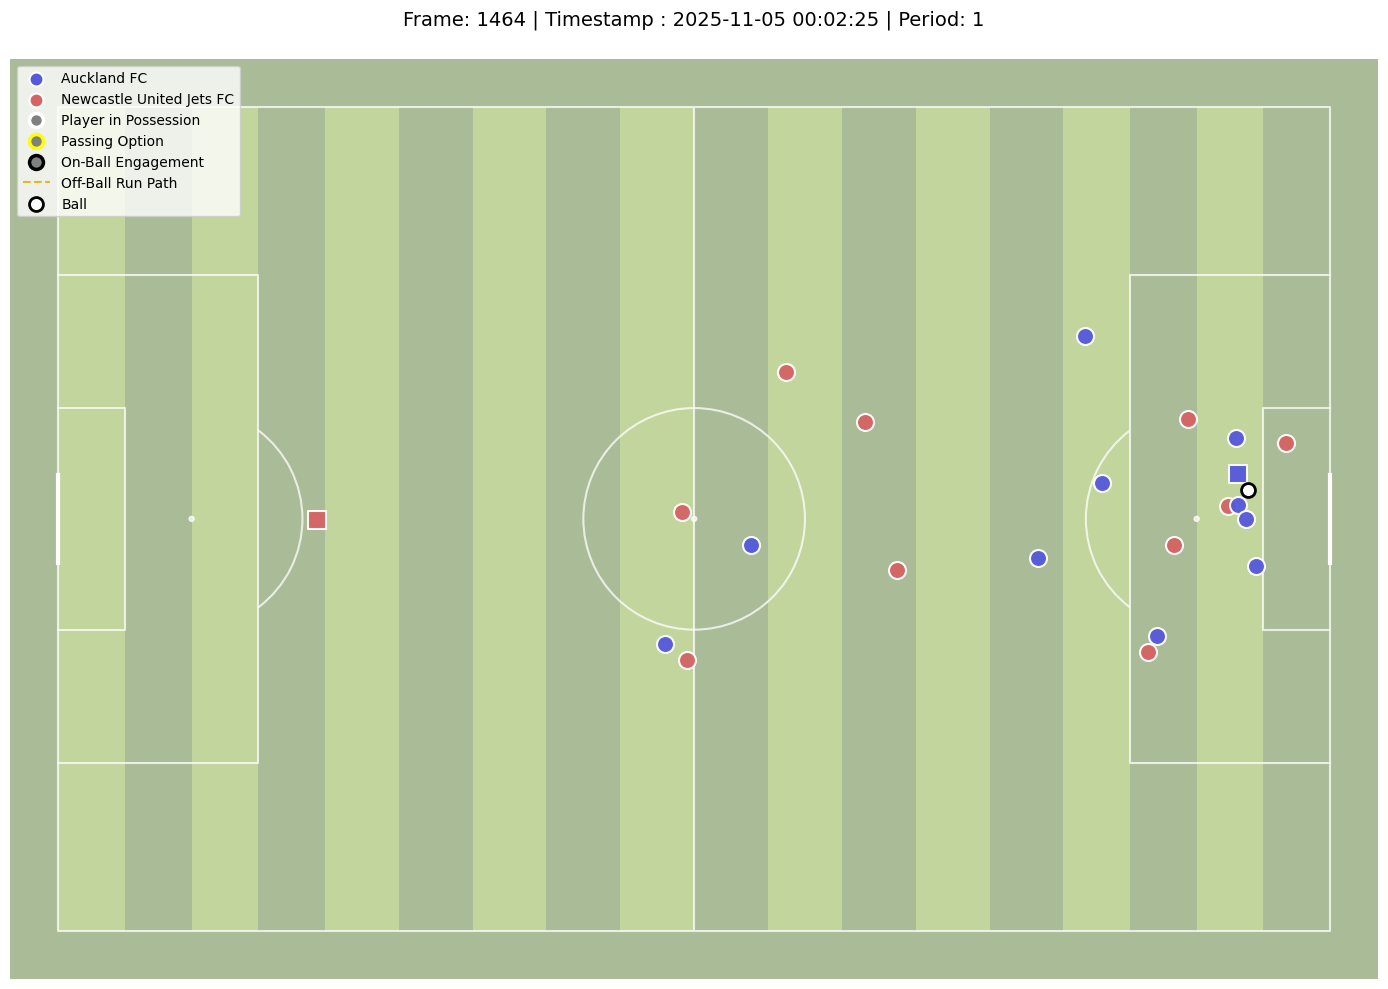

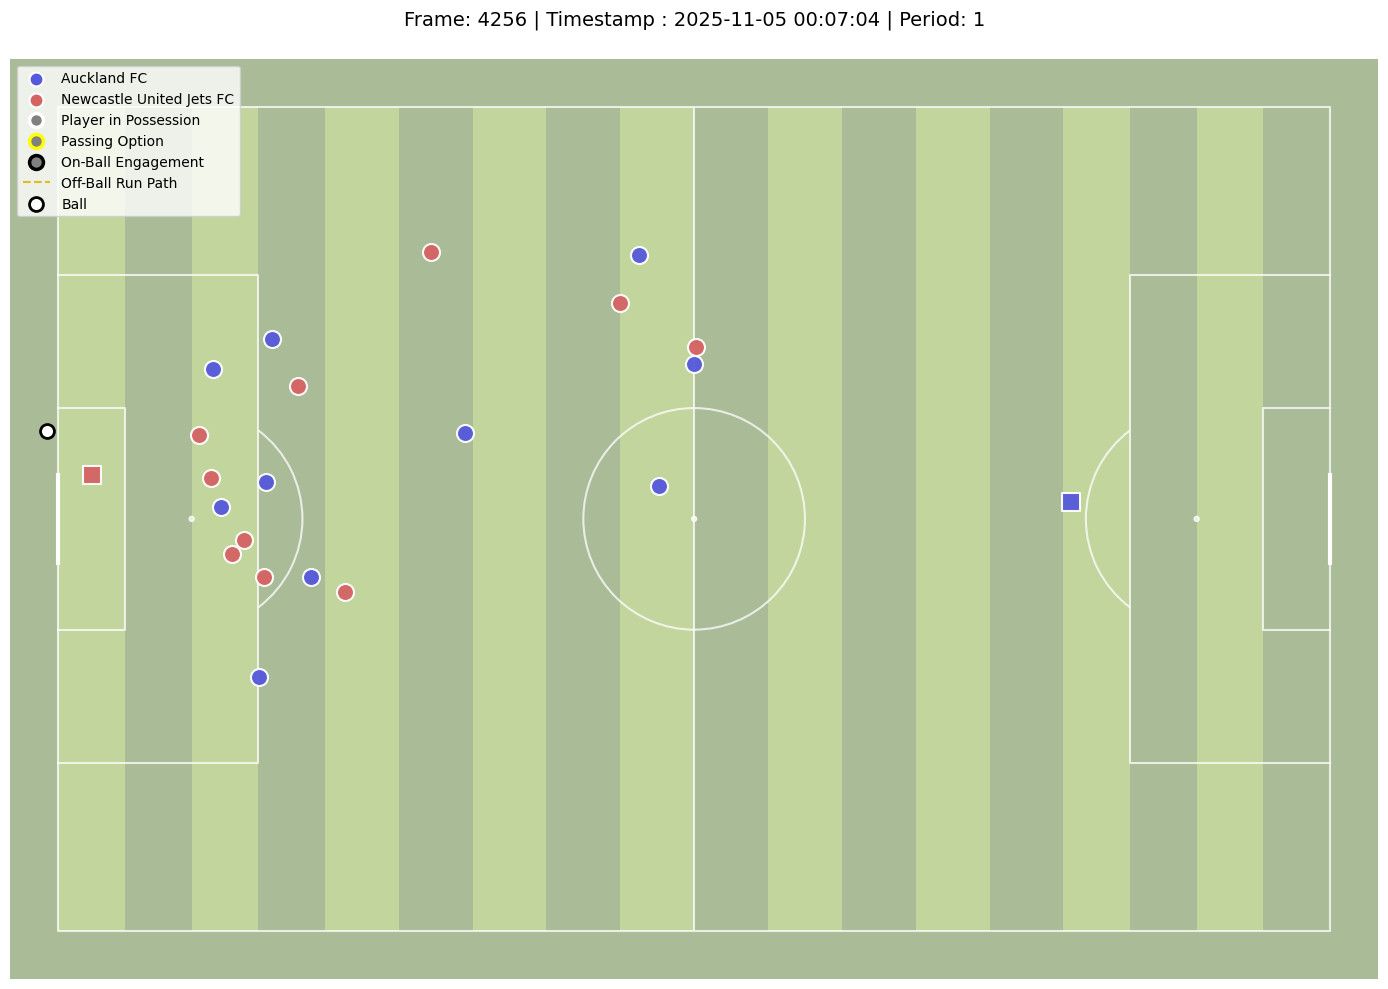

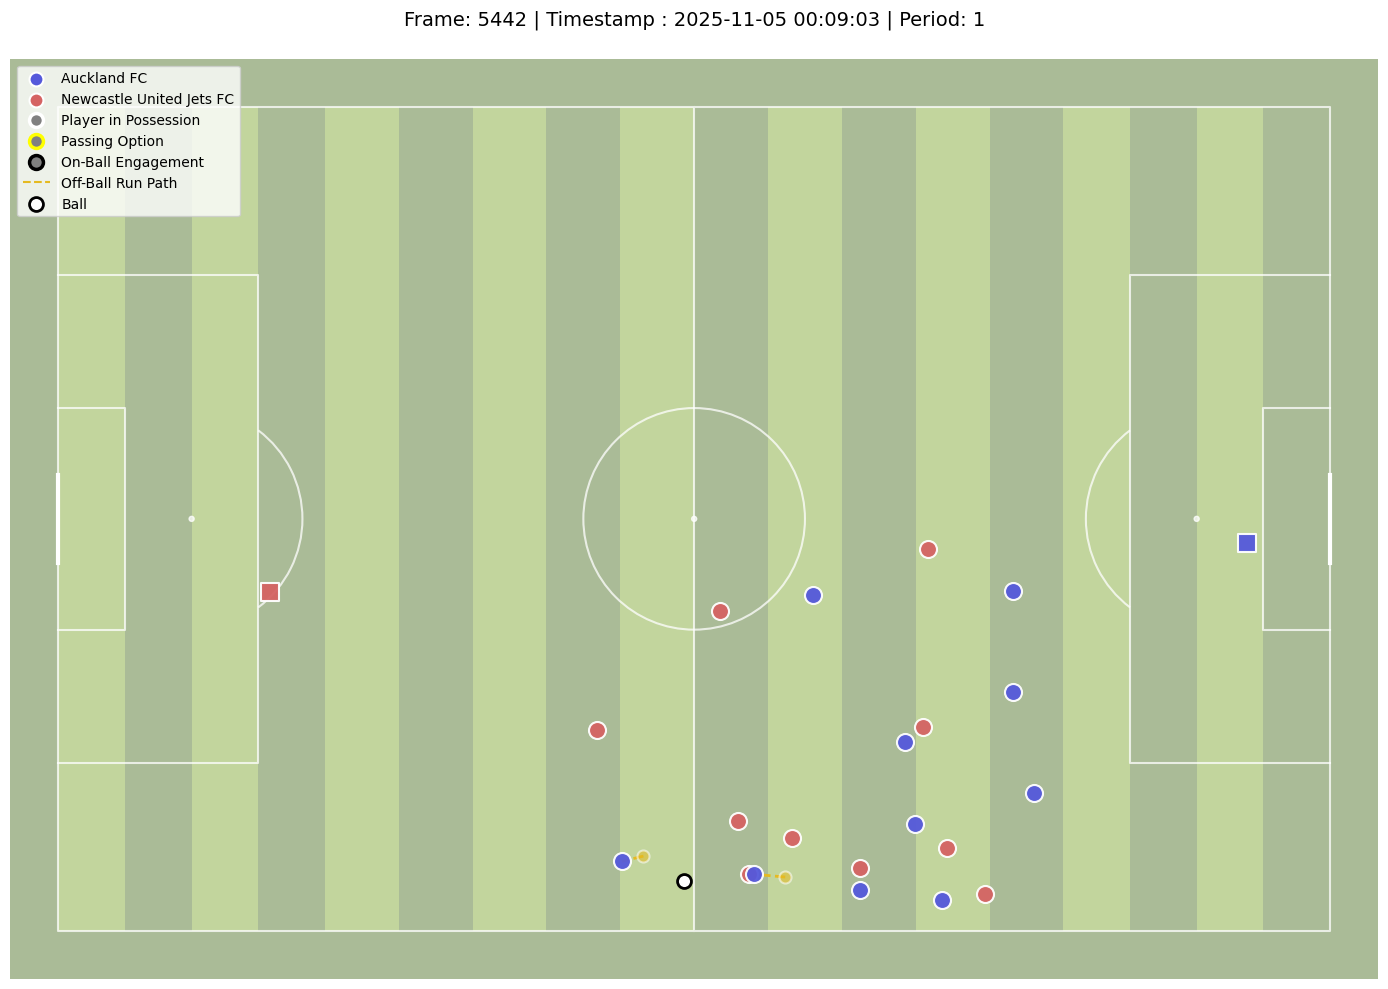

In [8]:
for i in range(len(all_shots)):
    start_frame = all_shots.iloc[i]['frame_start']
    end_frame = all_shots.iloc[i]['frame_end']
    print(f"Plotting shot {i+1}: frames {start_frame} to {end_frame}")
    game_renderer.plot_episode(match_id, start_frame=start_frame, end_frame=end_frame, delay=0)